In [1]:
%matplotlib inline

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=8425.536671636175,
      kernel='rbf', max_iter=-1, nu=0.05, random_state=None,
      shrinking=True, tol=0.001, verbose=False)

-142.35872426629592


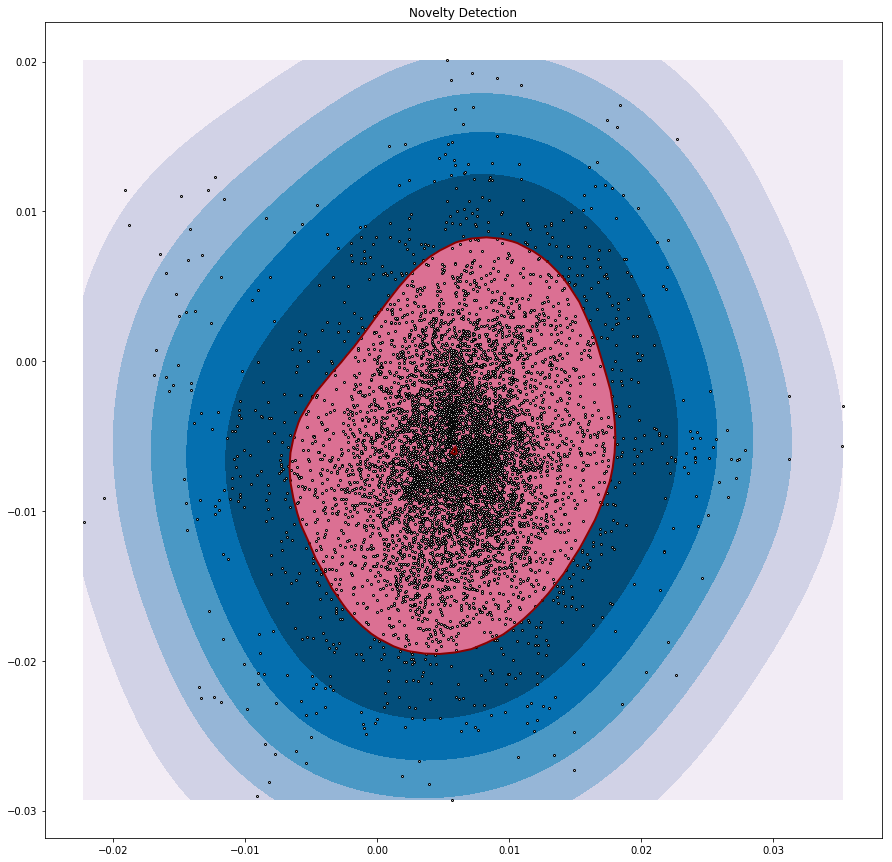

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

df = pd.read_csv('imu.csv')
#print(df.columns)

imu_x = df['imu_data__linear_acceleration_x'].values
imu_y = df['imu_data__linear_acceleration_y'].values
#imu_y = df['imu_data__linear_acceleration_y']
#imu_y.plot()
data = np.array([imu_x.tolist(), imu_y.tolist()]).transpose()
#display(data)
clf = svm.OneClassSVM(nu=.05, kernel="rbf", gamma=(1/(data.shape[1] * data.var())))
clf.fit(data)
display(clf)


xx, yy = np.meshgrid(np.linspace(np.min(data[:,0]), np.max(data[:,0]), 50), np.linspace(np.min(data[:,1]), np.max(data[:,1]), 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.rcParams['figure.figsize'] = [15, 15]

plt.title("Novelty Detection")
s=4
print(Z.min())
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(data[:, 0], data[:, 1], c='white', s=s, edgecolors='k')



==========================================
One-class SVM with non-linear kernel (RBF)
==========================================

An example using a one-class SVM for novelty detection.

`One-class SVM <svm_outlier_detection>` is an unsupervised
algorithm that learns a decision function for novelty detection:
classifying new data as similar or different to the training set.



In [30]:


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

#xx, yy, zz = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
# Generate train data
X = 0.3 * np.random.randn(200, 30)
X_train = np.r_[X + 2, X - 2]

# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 30)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 30))

# fit the model
clf = svm.OneClassSVM(nu=0.001, kernel="rbf", gamma='auto')
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
display(clf)
# plot the line, the points, and the nearest vectors to the plane
#Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
#Z = Z.reshape(xx.shape)
#display(Z.shape)

plt.rcParams['figure.figsize'] = [15, 15]

plt.title("Novelty Detection")
#plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
#a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
#plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 30
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

AttributeError: 'list' object has no attribute 'shape'

In [89]:
1 / (data.shape[1] * data.var())

183.37727372766872

In [105]:
data.min()

-0.029285272583365437